In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 100

baseDf = pd.read_csv('../../data/Data_Marketing_Customer_Analysis_Round3.csv')

#split numerical and categorical data frames

In [3]:
numerical = baseDf.select_dtypes(include=np.number)
categorical = baseDf.select_dtypes(include=object)


check if there are highly correlated features and drop them if there are any.


In [4]:
cor_matrix = numerical.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
baseDf.drop(to_drop, axis=1, inplace=True)

In [5]:
categorical

,region,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,arizona,no,basic,college,2/18/11,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,california,no,basic,college,1/18/11,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,washington,no,basic,bachelor,2/10/11,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,oregon,yes,extended,college,1/11/11,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,oregon,no,premium,bachelor,1/17/11,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10597,nevada,no,premium,bachelor,1/19/11,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10598,oregon,no,basic,college,1/6/11,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10599,arizona,no,extended,bachelor,2/6/11,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10600,california,no,premium,college,2/13/11,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).

In [6]:
categorical = pd.get_dummies(categorical, drop_first=True)
categorical

,region_california,region_nevada,region_oregon,region_washington,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,0,1,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10597,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10598,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
10599,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10600,1,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,1,0


for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.
(optional) remove the outliers from the numerical columns.

In [7]:
numerical[(np.abs(stats.zscore(numerical)) < 3).all(axis=1)]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,61311,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,25,31,0,7,707
...,...,...,...,...,...,...,...,...
10593,4547,33531,116,11,15,0,1,801
10594,3579,28304,91,10,30,2,1,655
10596,19228,86391,187,14,32,0,2,897
10598,5259,61146,65,7,68,0,6,273


X-y split (y is the target variable which is the total claim amount)

In [8]:
X = numerical.drop('total_claim_amount', axis=1)
y = numerical.total_claim_amount
X = X._get_numeric_data()


##Linear Regression

Train-test split.

In [9]:
X = numerical.drop('total_claim_amount', axis=1)
y = numerical.total_claim_amount
X = X._get_numeric_data()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

Standardize the data (after the data split).

In [18]:
std_scaler = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
# X_train.shape
X_test_scaled = std_scaler.transform(X_test)


In [20]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.44189489 -1.67579629 -0.82063648 ... -0.46463529 -0.41896865
   0.42195824]
 [-0.75141451  0.37769907 -0.61608966 ...  1.78759577 -0.41896865
  -0.82542674]
 [-0.79490195 -1.33591019 -0.64531063 ... -0.85788199 -0.41896865
  -0.82542674]
 ...
 [-0.67100654  0.87209721 -0.26543796 ... -1.07238018 -0.41896865
  -0.82542674]
 [-0.74017783  1.00822939 -0.58686868 ...  0.2503587   0.68553094
  -0.82542674]
 [-0.48640384  0.71221259 -0.87907843 ... -0.89363169 -0.41896865
   1.66934321]]
--------
[[ 1.12948996  1.02636688  1.63392538 ...  0.78660419 -0.41896865
  -0.40963175]
 [-0.01373338 -0.93947066 -0.73297355 ...  0.53635629  0.68553094
  -0.40963175]
 [ 1.8206191   1.44708399  0.26053958 ... -0.71488319 -0.41896865
  -0.40963175]
 ...
 [-0.64999248 -1.00159864 -0.11933309 ...  1.28709998 -0.41896865
  -0.82542674]
 [-0.33273852  1.00354353 -0.64531063 ...  0.82235389 -0.41896865
   1.25354822]
 [-0.69887936  0.44984508 -0.38232186 ...  1.28709998 -0.41896865
  -0.82542674]]


In [29]:
model=LinearRegression()    # model
model.fit(X_train_scaled,y_train)   # model train

LinearRegression()

In [30]:
model.coef_

array([ -7.93915164, -31.23142381, 190.99032744,  -0.98793901,
        -2.20093773,  -2.0875364 ,   1.96229082])

In [31]:
model.intercept_

437.423258320981

In [32]:
model.score(X_test_scaled,y_test)

0.38826163426502314

Apply linear regression.

In [33]:
y_pred=model.predict(X_test_scaled)

In [34]:
y_test

9774    1072
8236     453
4825     421
8032    1389
34       499
        ... 
7469     643
5918     383
2772     238
8265     340
6325      47
Name: total_claim_amount, Length: 3181, dtype: int64

In [35]:
y_pred

array([706.72794339, 324.46095161, 428.71334283, ..., 447.90552443,
       285.46264212, 352.44270176])

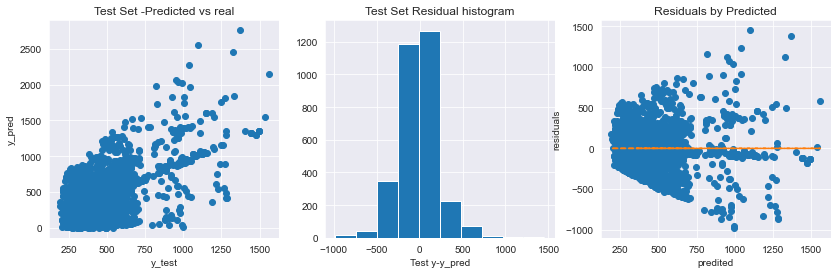

In [36]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')